In [1]:
import torch
import torch.nn as nn
import numpy as np


class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is ``(nc) x 64 x 64``
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf) x 32 x 32``
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*2) x 16 x 16``
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*4) x 8 x 8``
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*8) x 4 x 4``
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. ``(ngf*8) x 4 x 4``
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. ``(ngf*4) x 8 x 8``
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. ``(ngf*2) x 16 x 16``
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. ``(ngf) x 32 x 32``
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. ``(nc) x 64 x 64``
        )

    def forward(self, input):
        return self.main(input)
# modelD = torch.load("model_5000_40D.pth")
# modelG = torch.load("model_5000_40G.pth")

In [2]:
nz = 100
ngpu = 1
# generate random noise for input
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

In [3]:
# Number of workers for dataloader
workers = 0

# Batch size during training
batch_size = 64

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 1

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparameter for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1


subset_size = 10000

In [4]:
# the currently saved 12 epochs are of a completely diff model, so don't load them back. as we train we will overwrite them
nz=100
ngf
modelG = Generator(1).to(device)
modelD = Discriminator(1).to(device)

# NOTE currently the lower code adds CPU. this is because im loading rn w/o GPU access. otherwise use version directly below
# gen.load_state_dict(torch.load('/content/drive/MyDrive/Pic 16B/CAN/CAN_gen_epoch_12.pt')["model_state_dict"]) # currently set to 12
# disc.load_state_dict(torch.load('/content/drive/MyDrive/Pic 16B/CAN/CAN_disc_epoch_12.pt')["model_state_dict"])
modelG.load_state_dict(torch.load('DCGAN_gen_epoch_5000_44.pt',
                               map_location=torch.device('cpu'))["model_state_dict"]) # currently set to 12
modelD.load_state_dict(torch.load('DCGAN_disc_epoch_5000_44.pt',
                                map_location=torch.device('cpu'))["model_state_dict"])
print("Generator and discriminator models loaded")


Generator and discriminator models loaded


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


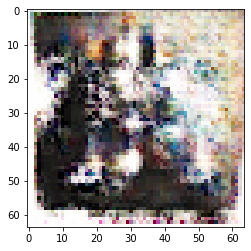

In [5]:
nz = 100
ngpu = 1
# generate random noise for input
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
fixed_noise = torch.randn(64, nz, 1, 1, device=device)
fake_img = modelG(fixed_noise)
output = modelD(fake_img).view(-1)
i = np.where(output >0.5)[0][0]

import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1)
ax.imshow(np.transpose(fake_img[0].detach(),(1,2,0)))

In [10]:
10000 // 64

156

In [ ]:
def dcgan_generate_images(generator, discriminator):
    
    nz = 100
    ngpu = 1
    # generate random noise for input
    device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
    fixed_noise = torch.randn(64, nz, 1, 1, device=device)
    # can make faster by adding count
    fake_img = generator(fixed_noise)
    output = discriminator(fake_img).view(-1)
    i = 0

    fig, ax = plt.subplots(1, 1)
    ax.imshow(np.transpose(fake_img.detach()[i],(1,2,0)))
    return fig, fake_img[0]


In [13]:
import numpy as np
import matplotlib.pyplot as plt

import random
import torchvision.transforms as transforms

import streamlit as st
import time

from io import BytesIO
from torchvision.utils import save_image
from PIL import Image


In [14]:
from torchvision.utils import save_image


fake_img = modelG(fixed_noise)
save_image(fake_img[0], 'testing.png')

img = Image.open("testing.png")

In [ ]:
from PIL import Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


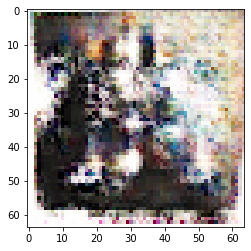

In [17]:
fig, ax = plt.subplots(1, 1)
ax.imshow(np.transpose(fake_img.detach()[i],(1,2,0)))

In [31]:
image = Image.open("testing.png")

In [28]:
img = img.thumbnail((500,500), Image.ANTIALIAS)

<ipython-input-28-33b2a928d714>:1: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.thumbnail((500,500), Image.ANTIALIAS)


In [34]:
width  = image.size[0]
height = image.size[1]

aspect = width / float(height)

ideal_width = 300
ideal_height = 300

ideal_aspect = ideal_width / float(ideal_height)

if aspect > ideal_aspect:
    # Then crop the left and right edges:
    new_width = int(ideal_aspect * height)
    offset = (width - new_width) / 2
    resize = (offset, 0, width - offset, height)
else:
    # ... crop the top and bottom:
    new_height = int(width / ideal_aspect)
    offset = (height - new_height) / 2
    resize = (0, offset, width, height - offset)

thumb = image.crop(resize).resize((ideal_width, ideal_height), Image.ANTIALIAS)

<ipython-input-34-5c641ad83869>:22: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  thumb = image.crop(resize).resize((ideal_width, ideal_height), Image.ANTIALIAS)


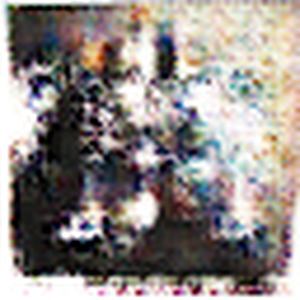

In [35]:
thumb

In [20]:
img = Image.open("testing.png")
with open("testing.png", "rb") as file:
    btn = st.download_button(
        label="Click here to download image!",
        data=file,
        file_name="testing.png",
        mime="image/png"
    )


2023-06-09 11:06:13.869 
  command:

    streamlit run /opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [11]:
from torchvision.utils import save_image
iters = 0
for j in range(157):
    fixed_noise = torch.randn(64, nz, 1, 1, device=device)
    fake_img = modelG(fixed_noise)
    for i in range(64):
        title = "fake_images/fake_img_" + str(iters) + ".png"
        save_image(fake_img[i], title)
        iters+=1



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


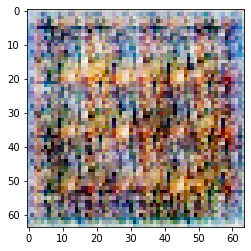

In [152]:
import matplotlib.pyplot as plt
import numpy as np
i=0
fig, ax = plt.subplots(1, 1)
ax.imshow(np.transpose(fake_img.detach()[i],(1,2,0)))

In [76]:
fig.canvas.draw()

# Now we can save it to a numpy array.
data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))

In [81]:
result = Image.fromarray(data.astype('uint8'), 'RGB')

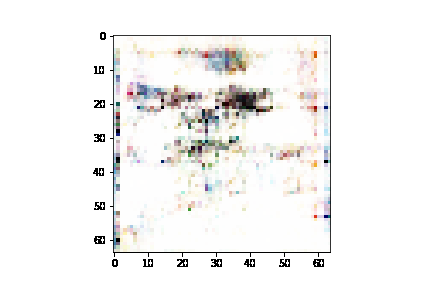

In [82]:
result

In [2]:
ds = deeplake.load('hub://activeloop/wiki-art')

NameError: name 'x' is not defined

In [74]:
fig.canvas.draw()


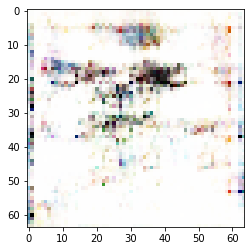

In [77]:
fig

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


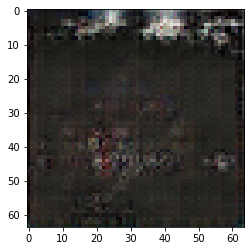

In [79]:
import matplotlib.pyplot as plt
import numpy as np
i=0
fig, ax = plt.subplots(1, 1)
ax.imshow(np.transpose(fake_img.detach()[i],(1,2,0)))

In [34]:
import io

import requests
import torchvision.transforms as transforms

from PIL import Image

img = Image.open("image_3.jpeg")
IMG_SIZE=64

tform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((IMG_SIZE,IMG_SIZE)),
    # transforms.CenterCrop(IMG_SIZE*0.5),
    # transforms.RandomCrop(IMG_SIZE*0.75, padding=2),
    # transforms.RandomHorizontalFlip(),   
    
    # ^ not so simple. uncommenting these sometimes leads to visualization errors (transformation fails idk)
    # also uncommenting makes the visualizations weird as you can imagine
    
    # transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    # ^ this maps the range [0, 1] into [-1, 1], because the minimum value 0 will be converted to 
    # (0-0.5)/0.5 = -1 and 1 -> (1-0.5)/0.5 = 1
    # this was used in the example I'm following
    
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    # ^ another option. i.e. for the 1st channel we have mean = 0.485, std = 0.229, etc.
    # these avlues are calculated from ImageNet, so they are standard practice. 
    # you can calculate the new mean and std on your training data but otherwise using the Imagenet pretrained 
    # model with its own mean and std is recommended. 
])
x = tform(img)
x.shape

# Expected result
# torch.Size([3, 224, 224])

torch.Size([3, 64, 64])

In [120]:
fake_img[0][0]

tensor([[0.4869, 0.5464, 0.5806,  ..., 0.4534, 0.4718, 0.4525],
        [0.5218, 0.6088, 0.5232,  ..., 0.4503, 0.4691, 0.4335],
        [0.4746, 0.6846, 0.5864,  ..., 0.4941, 0.4246, 0.4943],
        ...,
        [0.3815, 0.5521, 0.5044,  ..., 0.3340, 0.2786, 0.3429],
        [0.4475, 0.6244, 0.6043,  ..., 0.4517, 0.3976, 0.4601],
        [0.4362, 0.5610, 0.5790,  ..., 0.4428, 0.4455, 0.3775]],
       grad_fn=<SelectBackward0>)

In [30]:
fake_img.shape

torch.Size([64, 3, 64, 64])

In [35]:
x = x[None, :]

In [63]:
output = modelD(x).view(-1)
output = round(output[0].item() * 100,3)
print(output)

In [66]:
IMG_SIZE = 64
tform = transforms.Compose([
transforms.ToTensor(),
transforms.Resize((IMG_SIZE,IMG_SIZE)),
])
x  = tform(img)
x = x[None, :] # change dimensions for model X
output = modelD(x).view(-1)
output = modelD(x).view(-1)
probability = round(output[0].item() * 100,3)

In [99]:
probability

3.417

In [100]:
fig.savefig("hi.png")

In [143]:
from torchvision.utils import save_image
save_image(fake_img[0], 'img1.png')

temp = Image.open("img1.png")

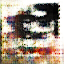

In [144]:
temp

In [105]:
# Now we can save it to a numpy array.
data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))

In [108]:
data.shape

(288, 432, 3)

In [2]:
ds = deeplake.load('hub://activeloop/wiki-art')

NameError: name 'x' is not defined

In [110]:
import imageio
image = imageio.imread('testing.png')

In [141]:
fake_img[0]

tensor([[[0.8924, 0.9123, 0.9630,  ..., 0.9996, 0.9997, 0.9993],
         [0.9309, 0.9560, 0.9698,  ..., 0.9963, 0.9937, 0.9997],
         [0.9266, 0.9756, 0.9860,  ..., 0.9920, 0.9923, 0.9999],
         ...,
         [0.2118, 0.3727, 0.5157,  ..., 0.9672, 0.8584, 0.8408],
         [0.2452, 0.4178, 0.4833,  ..., 0.9693, 0.9164, 0.9376],
         [0.3084, 0.4074, 0.4219,  ..., 0.9405, 0.9207, 0.8975]],

        [[0.8698, 0.8821, 0.9523,  ..., 0.9997, 0.9998, 0.9988],
         [0.9298, 0.9279, 0.9847,  ..., 0.9917, 0.9985, 0.9997],
         [0.9371, 0.9620, 0.9865,  ..., 0.9944, 0.9933, 0.9998],
         ...,
         [0.2208, 0.2311, 0.4923,  ..., 0.9151, 0.8868, 0.7999],
         [0.2289, 0.3180, 0.4226,  ..., 0.9255, 0.9139, 0.8724],
         [0.2975, 0.3324, 0.4141,  ..., 0.9043, 0.9360, 0.8728]],

        [[0.8091, 0.7894, 0.9118,  ..., 0.9990, 0.9995, 0.9972],
         [0.8657, 0.8850, 0.9247,  ..., 0.9875, 0.9918, 0.9993],
         [0.8388, 0.8618, 0.9349,  ..., 0.9903, 0.9930, 0.